In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Nadirah\Training\titanic.csv')

In [8]:
df.head(20)

Survived  Pclass     Sex   Age  Siblings/Spouses Aboard  \
0          0       3    male  22.0                        1   
1          1       1  female  38.0                        1   
2          1       3  female  26.0                        0   
3          1       1  female  35.0                        1   
4          0       3    male  35.0                        0   
5          0       3    male  27.0                        0   
6          0       1    male  54.0                        0   
7          0       3    male   2.0                        3   
8          1       3  female  27.0                        0   
9          1       2  female  14.0                        1   
10         1       3  female   4.0                        1   
11         1       1  female  58.0                        0   
12         0       3    male  20.0                        0   
13         0       3    male  39.0                        1   
14         0       3  female  14.0                        0   
15         1       2  female  55.0                        0   
16         0       3    male   2.0                        4   
17         1       2    male  23.0                        0   
18         0       3  female  31.0                        1   
19         1       3  female  22.0                        0   

    Parents/Children Aboard     Fare  
0                         0   7.2500  
1                         0  71.2833  
2                         0   7.9250  
3                         0  53.1000  
4                         0   8.0500  
5                         0   8.4583  
6                         0  51.8625  
7                         1  21.0750  
8                         2  11.1333  
9                         0  30.0708  
10                        1  16.7000  
11                        0  26.5500  
12                        0   8.0500  
13                        5  31.2750  
14                        0   7.8542  
15                        0  16.0000  
16                        1  29.1250  
17                        0  13.0000  
18                        0  18.0000  
19                        0   7.2250

In [4]:
df.tail()

Survived  Pclass     Sex   Age  Siblings/Spouses Aboard  \
882         0       2    male  27.0                        0   
883         1       1  female  19.0                        0   
884         0       3  female   7.0                        1   
885         1       1    male  26.0                        0   
886         0       3    male  32.0                        0   

     Parents/Children Aboard   Fare  
882                        0  13.00  
883                        0  30.00  
884                        2  23.45  
885                        0  30.00  
886                        0   7.75

In [5]:
df.shape

(887, 7)

In [ ]:
df.describe()

In [8]:
data_train =df.sample(frac=0.8, random_state = 786)

In [9]:
data_train.shape

(710, 7)

In [10]:
data_train.head()

Survived  Pclass     Sex   Age  Siblings/Spouses Aboard  \
198         0       2  female  24.0                        0   
25          1       3  female  38.0                        1   
859         0       3  female  14.0                        8   
245         0       3  female  25.0                        0   
709         1       1    male  48.0                        1   

     Parents/Children Aboard     Fare  
198                        0  13.0000  
25                         5  31.3875  
859                        2  69.5500  
245                        0   7.7750  
709                        0  52.0000

In [11]:
data_test = df.drop(data_train.index)


In [12]:
from pycaret.clustering import *

In [32]:
clust =setup(data = data_train,normalize = True,ignore_features=["Sex"],session_id=123)

In [14]:
kmeans = create_model("kmeans")

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.2625           192.3904          1.3437            0           0   

   Completeness  
0             0

In [15]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)


In [20]:
kmeans_result = assign_model(kmeans)

In [33]:
kmeans_result.head()

Survived  Pclass     Sex   Age  Siblings/Spouses Aboard  \
198         0       2  female  24.0                        0   
25          1       3  female  38.0                        1   
859         0       3  female  14.0                        8   
245         0       3  female  25.0                        0   
709         1       1    male  48.0                        1   

     Parents/Children Aboard     Fare    Cluster  
198                        0  13.0000  Cluster 0  
25                         5  31.3875  Cluster 1  
859                        2  69.5500  Cluster 1  
245                        0   7.7750  Cluster 0  
709                        0  52.0000  Cluster 2

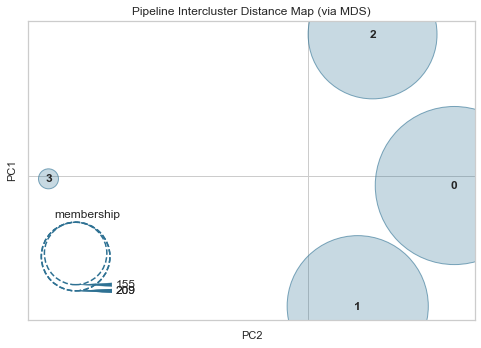

In [24]:
plot_model(kmeans,plot='distance')

In [22]:
save_model(kmeans, 'mykmeans')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['Pclass'], id_columns=[],
                                       ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numeri...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 

In [25]:
pred_kmeans = predict_model(kmeans,data=data_train)

In [26]:
pred_kmeans.head()

Survived  Pclass     Sex   Age  Siblings/Spouses Aboard  \
198         0       2  female  24.0                        0   
25          1       3  female  38.0                        1   
859         0       3  female  14.0                        8   
245         0       3  female  25.0                        0   
709         1       1    male  48.0                        1   

     Parents/Children Aboard     Fare    Cluster  
198                        0  13.0000  Cluster 0  
25                         5  31.3875  Cluster 1  
859                        2  69.5500  Cluster 1  
245                        0   7.7750  Cluster 0  
709                        0  52.0000  Cluster 2

In [34]:
dt_kmeans = load_model('mykmeans')

Transformation Pipeline and Model Successfully Loaded


In [30]:
pred_kmeans2 =predict_model(dt_kmeans,data=data_train)

In [31]:
pred_kmeans2.head()

Survived  Pclass     Sex   Age  Siblings/Spouses Aboard  \
198         0       2  female  24.0                        0   
25          1       3  female  38.0                        1   
859         0       3  female  14.0                        8   
245         0       3  female  25.0                        0   
709         1       1    male  48.0                        1   

     Parents/Children Aboard     Fare    Cluster  
198                        0  13.0000  Cluster 0  
25                         5  31.3875  Cluster 1  
859                        2  69.5500  Cluster 1  
245                        0   7.7750  Cluster 0  
709                        0  52.0000  Cluster 2

In [ ]:
# after you train the model, you can train again using transactional data & then export
#once exported to csv, open the same file in power bi. Now cluster column is there




In [2]:
pred_kmeans.to_csv("mykmeans_result.csv")

NameError: name 'pred_kmeans' is not defined